In [1]:
import pandas as pd
import numpy as np

In [4]:
df_port = pd.read_csv("Portmap/Portmap_level1.csv")

In [5]:
df_port.loc[df_port[' Protocol'] == 0][' Label'].unique()

array(['BENIGN'], dtype=object)

In [6]:
df_dns = pd.read_csv("DNS/DNS_level1.csv")

In [7]:
df_dns[' Protocol'].unique() 

array([ 6,  0, 17])

In [8]:
df_dns.loc[df_dns[' Protocol'] == 17]

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
20,51556,53,17,56824,2,2,64.0,256.0,32.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,BENIGN
21,53554,53,17,104191,2,2,82.0,114.0,41.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,BENIGN
26,54578,53,17,65115,2,2,62.0,182.0,31.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,BENIGN
27,57129,53,17,20700,2,2,94.0,206.0,47.0,47.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,BENIGN
29,57129,53,17,45922,2,2,94.0,206.0,47.0,47.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10717,520,59068,17,2,2,0,1798.0,0.0,899.0,899.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DrDoS_DNS
10718,745,54723,17,47,2,0,2944.0,0.0,1472.0,1472.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DrDoS_DNS
10719,861,23956,17,1,2,0,2944.0,0.0,1472.0,1472.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DrDoS_DNS
10720,782,38191,17,49,2,0,2944.0,0.0,1472.0,1472.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DrDoS_DNS


In [9]:
df_dns.loc[df_dns[' Protocol'] == 0][' Label'].unique()

array(['BENIGN'], dtype=object)

In [10]:
df_ldap = pd.read_csv("LDAP/LDAP_level1.csv")

In [11]:
df_mssql = pd.read_csv("MSSQL/MSSQL_level1.csv")

In [12]:
df_mssql[' Protocol'].unique()

array([ 0,  6, 17])

In [13]:
df_netbios = pd.read_csv("Netbios/Netbios_level1.csv")

In [14]:
df_ntp = pd.read_csv("NTP/NTP_level1.csv")

In [15]:
df_snmp = pd.read_csv("SNMP/SNMP_level1.csv")

In [16]:
df_ssdp = pd.read_csv("SSDP/SSDP_level1.csv")

In [17]:
df_udp = pd.read_csv("UDP/UDP_level1.csv")

In [18]:
df_syn = pd.read_csv("SYN/SYN_level1.csv")

In [19]:
df_tftp = pd.read_csv("TFTP/TFTP_level1.csv")

In [20]:
df_udplag = pd.read_csv("UDPLag/UDPLag_level1.csv")

In [21]:
print("Shape of dataframes: ")
print("LDAP - ", df_ldap.shape)
print("MSSQL - ", df_mssql.shape)
print("NetBIOS - ", df_netbios.shape)
print("Portmap - ", df_port.shape)
print("Syn - ", df_syn.shape)
print("UDP - ", df_udp.shape)
print("UDPLag - ", df_udplag.shape)
print("DNS - ", df_dns.shape)
print("NTP - ", df_ntp.shape)
print("SNMP - ", df_snmp.shape)
print("SSDP - ", df_ssdp.shape)
print("TFTP - ", df_tftp.shape)

Shape of dataframes: 
LDAP -  (13390, 68)
MSSQL -  (11841, 68)
NetBIOS -  (10423, 68)
Portmap -  (11788, 68)
Syn -  (36946, 68)
UDP -  (12234, 68)
UDPLag -  (14219, 68)
DNS -  (10722, 68)
NTP -  (19492, 68)
SNMP -  (9206, 68)
SSDP -  (8611, 68)
TFTP -  (28198, 68)


In [22]:
df_final = pd.concat([df_ldap, df_mssql, df_netbios, 
                      df_port, df_syn, df_udp,
                     df_dns, df_ntp, df_snmp, df_ssdp,
                     df_tftp, df_udplag])

In [23]:
df_final.shape

(187070, 68)

In [24]:
data_classes = list(df_final[' Label'].unique())

In [25]:
df_final_counts = df_final.groupby(' Label')[' Label'].count().reset_index(name="count")

In [26]:
df_final_counts

,Label,count
0,BENIGN,91070
1,DrDoS_DNS,8000
2,DrDoS_MSSQL,8000
3,DrDoS_NTP,8000
4,DrDoS_SNMP,8000
5,DrDoS_SSDP,8000
6,LDAP,8000
7,NetBIOS,8000
8,Portmap,8000
9,Syn,8000


In [27]:
df_final[' Label'] = df_final[' Label'].apply(data_classes.index)

In [28]:
df_final[' Label'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [29]:
X = df_final.drop(' Label', axis = 1)

In [30]:
X.shape

(187070, 67)

In [31]:
y = df_final[' Label'].values

In [32]:
for i in range(len(y)):
    if y[i] != 0:
        y[i] = 1

In [33]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [34]:
from sklearn.feature_selection import SelectKBest, f_classif

anova_features = SelectKBest(f_classif)

In [35]:
k_best_features_anova = anova_features.fit_transform(X, y)

In [36]:
for i in range(len(anova_features.scores_)):
    if anova_features.scores_[i] > 50000:
        print(X.columns[i], ":", anova_features.scores_[i])

 Destination Port : 60570.83759933815
 Protocol : 70288.75196436733
 Fwd Packet Length Min : 101776.66725523437
 Fwd Packet Length Mean : 94563.62531786266
Fwd Packets/s : 63627.01949988076
 Min Packet Length : 102897.37175057246
 Packet Length Mean : 79440.88710463131
 URG Flag Count : 82070.4456715249
 Down/Up Ratio : 69359.98103431522
 Average Packet Size : 79935.01802585588
 Avg Fwd Segment Size : 94563.62531786266
 Inbound : 414754.80339807295


In [37]:
X = df_final[[' Destination Port',
            ' Protocol',
            ' Fwd Packet Length Min',
            ' Fwd Packet Length Mean',
            'Fwd Packets/s',
            ' Min Packet Length',
            ' Packet Length Mean',
            ' URG Flag Count',
            ' Down/Up Ratio',
            ' Average Packet Size',
            ' Avg Fwd Segment Size',
            ' Inbound']].values

In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
scaler = MinMaxScaler()

In [39]:
X = scaler.fit_transform(X)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 11, test_size = 0.2, shuffle = True)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
classifier_knn = KNeighborsClassifier(n_neighbors = 5)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [43]:
pred_knn = classifier_knn.predict(X_test)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18171
           1       1.00      1.00      1.00     19243

    accuracy                           1.00     37414
   macro avg       1.00      1.00      1.00     37414
weighted avg       1.00      1.00      1.00     37414



<AxesSubplot:>

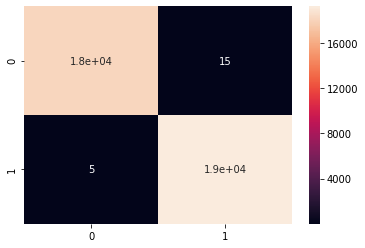

In [45]:
import seaborn as sns
cm = confusion_matrix(y_test, pred_knn)
sns.heatmap(cm, annot = True)

In [46]:
from sklearn.tree import DecisionTreeClassifier

classifier_tree = DecisionTreeClassifier(criterion = 'entropy', splitter = 'random' )
classifier_tree.fit(X_train, y_train)

pred_tree = classifier_tree.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18171
           1       1.00      1.00      1.00     19243

    accuracy                           1.00     37414
   macro avg       1.00      1.00      1.00     37414
weighted avg       1.00      1.00      1.00     37414



<AxesSubplot:>

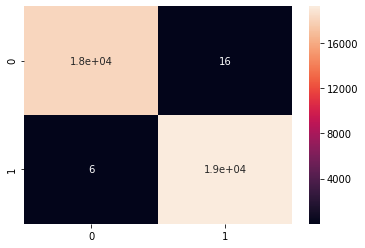

In [47]:
cm = confusion_matrix(y_test, pred_tree)
sns.heatmap(cm, annot = True)

In [48]:
from sklearn.svm import SVC

classifier_svc = SVC(C = 1, gamma = 1)

classifier_svc.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [49]:
pred_svc = classifier_svc.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18171
           1       0.99      1.00      1.00     19243

    accuracy                           1.00     37414
   macro avg       1.00      1.00      1.00     37414
weighted avg       1.00      1.00      1.00     37414



<AxesSubplot:>

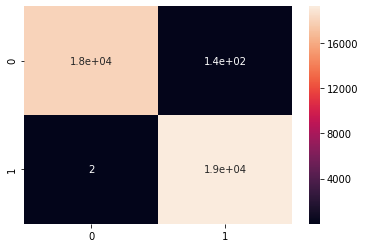

In [50]:
cm = confusion_matrix(y_test, pred_svc)
sns.heatmap(cm, annot = True)

In [51]:
df_port1 = pd.read_csv("Portmap/Portmap_test.csv")

In [52]:
df_dns1 = pd.read_csv("DNS/DNS_test.csv")

In [53]:
df_ldap1 = pd.read_csv("LDAP/LDAP_test.csv")

In [54]:
df_mssql1 = pd.read_csv("MSSQL/MSSQL_test.csv")

In [55]:
df_netbios1 = pd.read_csv("Netbios/Netbios_test.csv")

df_ntp1 = pd.read_csv("NTP/NTP_test.csv")

df_snmp1 = pd.read_csv("SNMP/SNMP_test.csv")

df_ssdp1 = pd.read_csv("SSDP/SSDP_test.csv")

df_udp1 = pd.read_csv("UDP/UDP_test.csv")

df_syn1 = pd.read_csv("SYN/SYN_test.csv")

df_tftp1 = pd.read_csv("TFTP/TFTP_test.csv")

df_udplag1 = pd.read_csv("UDPLag/UDPLag_test.csv")

In [56]:
df_final1 = pd.concat([df_ldap1, df_mssql1, df_netbios1, 
                      df_port1, df_syn1, df_udp1,
                     df_dns1, df_ntp1, df_snmp1, df_ssdp1,
                     df_tftp1, df_udplag1])

In [57]:
df_final1.shape

(286758, 68)

In [58]:
data_classes1 = list(df_final1[' Label'].unique())

In [59]:
df_final_counts1 = df_final1.groupby(' Label')[' Label'].count().reset_index(name="count")

In [60]:
df_final_counts1

,Label,count
0,BENIGN,22758
1,DrDoS_DNS,22000
2,DrDoS_MSSQL,22000
3,DrDoS_NTP,22000
4,DrDoS_SNMP,22000
5,DrDoS_SSDP,22000
6,LDAP,22000
7,NetBIOS,22000
8,Portmap,22000
9,Syn,22000


In [61]:
df_final1[' Label'] = df_final1[' Label'].apply(data_classes1.index)

In [62]:
df_final1[' Label'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [63]:
y1 = df_final1[' Label'].values

for i in range(len(y1)):
    if y1[i] != 0:
        y1[i] = 1

In [64]:
X1 = df_final1[[' Destination Port',
            ' Protocol',
            ' Fwd Packet Length Min',
            ' Fwd Packet Length Mean',
            'Fwd Packets/s',
            ' Min Packet Length',
            ' Packet Length Mean',
            ' URG Flag Count',
            ' Down/Up Ratio',
            ' Average Packet Size',
            ' Avg Fwd Segment Size',
            ' Inbound']].values

In [65]:
X1 = scaler.transform(X1)

In [66]:
pred_knn1 = classifier_knn.predict(X1)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y1, pred_knn1))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     22758
           1       1.00      1.00      1.00    264000

    accuracy                           1.00    286758
   macro avg       1.00      1.00      1.00    286758
weighted avg       1.00      1.00      1.00    286758



<AxesSubplot:>

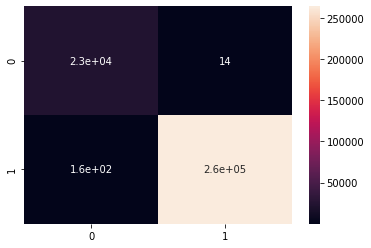

In [67]:
cm = confusion_matrix(y1, pred_knn1)
sns.heatmap(cm, annot = True)

In [68]:
pred_tree1 = classifier_tree.predict(X1)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y1, pred_tree1))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     22758
           1       1.00      1.00      1.00    264000

    accuracy                           1.00    286758
   macro avg       1.00      1.00      1.00    286758
weighted avg       1.00      1.00      1.00    286758



<AxesSubplot:>

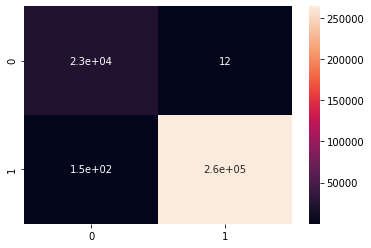

In [69]:
cm = confusion_matrix(y1, pred_tree1)
sns.heatmap(cm, annot = True)